In [79]:
from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [80]:
naim = 'APL_vs_time.csv'
apl = {}
for charge in ['0.0', '-0.3','-0.5','-1.0','-1.2','-1.7','-1.9','-2.0']:
    apl[charge] = np.loadtxt(charge + '/' + naim, comments=['#','@','&'])

mean = [np.mean(apl[charge],0)[1] for charge in ['0.0', '-0.3','-0.5','-1.0','-1.2','-1.7','-1.9','-2.0']]
std = [np.std(apl[charge],0)[1] for charge in ['0.0', '-0.3','-0.5','-1.0','-1.2','-1.7','-1.9','-2.0']]

In [117]:
fig, ax = plt.subplots()
n_groups = 8
index = np.arange(n_groups)

bar_width = 0.35
opacity = 0.5
error_config = {'ecolor': '0.1'}
rects = ax.bar(index, mean, bar_width, tick_label=('0.0', '-0.3', '-0.5', '-1.0', '-1.2', '-1.7', '-1.9', '-2.0'), alpha=opacity, color='b', yerr=std, error_kw=error_config)
ax.set_ylim([45, 56])


def autolabel(rects):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                "{:5.1f}".format(mean[idx]),
                ha='center', va='bottom', rotation=0)

autolabel(rects)

ax.set_xlabel('Maleic acid charge')
ax.set_ylabel('APL, Å^2')
ax.set_title('APL as a function of charge')
ax.set_xticks(index)


#ax.legend()

#fig.tight_layout()
#plt.show()
plt.savefig('APL_vs_charge.png')
plt.close()

In [118]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

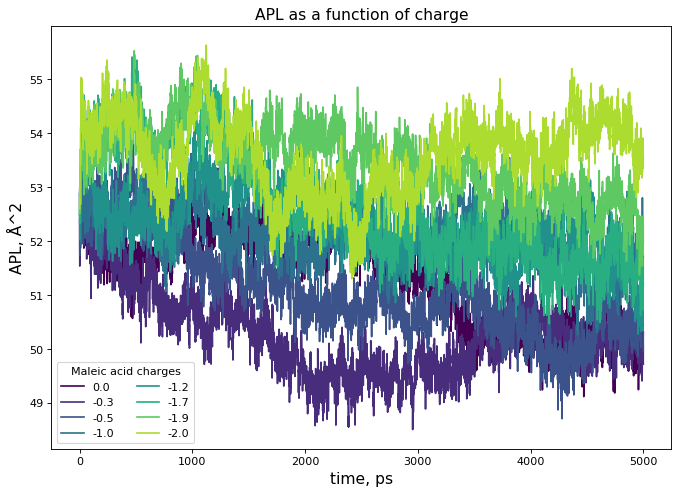

In [122]:
fig = plt.figure(figsize=(10, 7), dpi=80)
ax = fig.add_subplot(111)
viridis = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=8)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=viridis)

keys = ['0.0', '-0.3','-0.5','-1.0','-1.2','-1.7','-1.9','-2.0']
indices = range(8)
values = dict(zip(keys, indices))

for key, traj in apl.items():
    colorVal = scalarMap.to_rgba(values[key])
    colorText = (
        'color: (%4.2f,%4.2f,%4.2f)'%(colorVal[0],colorVal[1],colorVal[2])
        )
    retLine, = ax.plot(traj.T[1],
                       color=colorVal,
                       label=colorText)

handles, labels = ax.get_legend_handles_labels()
labels = keys
ax.legend(handles, keys, loc='lower left', title='Maleic acid charges', ncol=2)
ax.set_xlabel('time, ps', fontsize=14)
ax.set_ylabel('APL, Å^2', fontsize=14)
ax.set_title('APL as a function of charge', fontsize=14)
plt.savefig('APL_vs_time.png')